#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read Datasets

In [ ]:
#Datasets preparing and selection(filtering)
resturants = pd.read_csv("geoplaces2.csv")
rate = pd.read_csv("rating_final.csv")
resturants.head()

,index,placeID,latitude,longitude,the_geom_meter,name,address,city,state,country,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,0,134999,18.915421,-99.184871,0101000020957F000088568DE356715AC138C0A525FC46...,Kiku Cuernavaca,Revolucion,Cuernavaca,Morelos,Mexico,...,No_Alcohol_Served,none,informal,no_accessibility,medium,kikucuernavaca.com.mx,familiar,f,closed,none
1,1,132825,22.147392,-100.983092,0101000020957F00001AD016568C4858C1243261274BA5...,puesto de tacos,esquina santos degollado y leon guzman,s.l.p.,s.l.p.,mexico,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,f,open,none
2,2,135106,22.149709,-100.976093,0101000020957F0000649D6F21634858C119AE9BF528A3...,El Rincón de San Francisco,Universidad 169,San Luis Potosi,San Luis Potosi,Mexico,...,Wine-Beer,only at bar,informal,partially,medium,?,familiar,f,open,none
3,3,132667,23.752697,-99.163359,0101000020957F00005D67BCDDED8157C1222A2DC8D84D...,little pizza Emilio Portes Gil,calle emilio portes gil,victoria,tamaulipas,?,...,No_Alcohol_Served,none,informal,completely,low,?,familiar,t,closed,none
4,4,132613,23.752903,-99.165076,0101000020957F00008EBA2D06DC8157C194E03B7B504E...,carnitas_mata,lic. Emilio portes gil,victoria,Tamaulipas,Mexico,...,No_Alcohol_Served,permitted,informal,completely,medium,?,familiar,t,closed,none


Text(0.5, 1.0, 'Percentages for Prices')

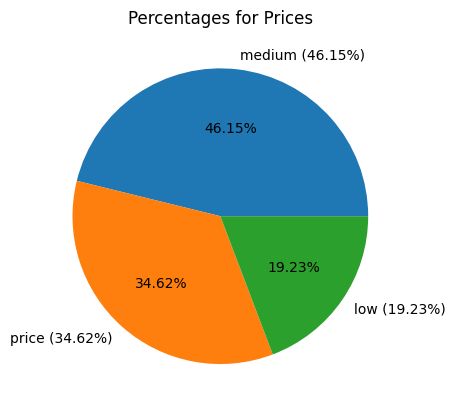

In [ ]:
resturants["price"].value_counts()
total = resturants["price"].value_counts()["medium"] + resturants["price"].value_counts()["low"] + resturants["price"].value_counts()["high"]
values = [resturants["price"].value_counts()["medium"] , resturants["price"].value_counts()["low"] , resturants["price"].value_counts()["high"]]
pers = [c / total * 100 for c in values]
rating_vals = ["medium","price","low"]
plt.pie(
    values,
    labels=[f"{r} ({per:.2f}%)" for r, per in zip(rating_vals, pers)],
    autopct='%1.2f%%'

)
plt.title("Percentages for Prices")

Text(0.5, 1.0, 'Histogram')

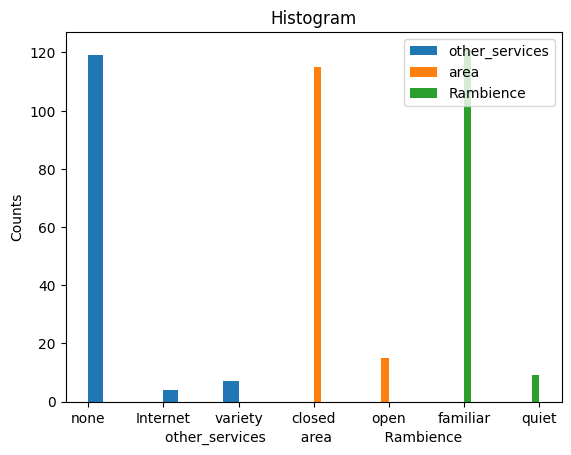

In [ ]:
#Distribution of other_services,area and Rambience
plt.hist(resturants["other_services"],label="other_services")
plt.hist(resturants["area"],label="area")
plt.hist(resturants["Rambience"],label="Rambience")
plt.xlabel("other_services        area            Rambience")
plt.ylabel("Counts")
plt.legend()
plt.title("Histogram")

In [ ]:
rate.head()

,index,userID,placeID,rating,food_rating,service_rating
0,0,U1077,135085,2,2,2
1,1,U1077,135038,2,2,1
2,2,U1077,132825,2,2,2
3,3,U1077,135060,1,2,2
4,4,U1068,135104,1,1,2


Text(0.5, 1.0, 'Relation between rating and food_rating')

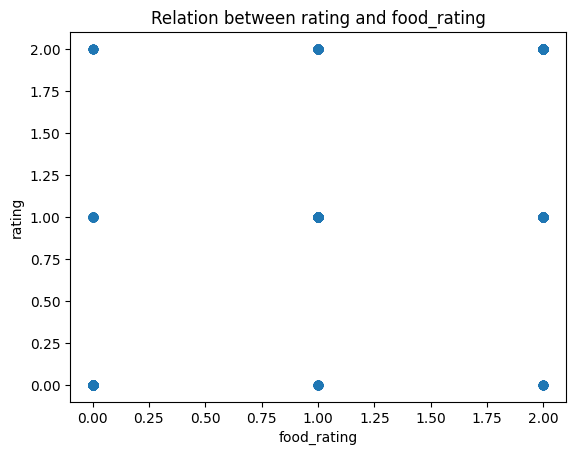

In [ ]:
plt.scatter(rate["food_rating"],rate["rating"])
plt.xlabel("food_rating")
plt.ylabel("rating")
plt.title("Relation between rating and food_rating")
#No relation as figure

Text(0.5, 1.0, 'Relation between rating and service_rating')

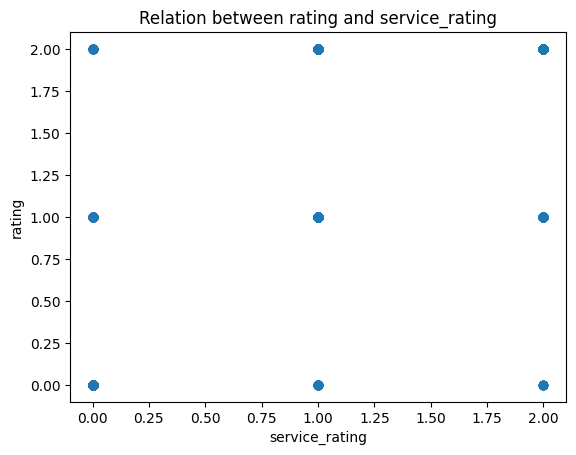

In [ ]:
plt.scatter(rate["service_rating"],rate["rating"])
plt.xlabel("service_rating")
plt.ylabel("rating")
plt.title("Relation between rating and service_rating")
#No relation as figure

Text(0.5, 1.0, 'Histogram of rating')

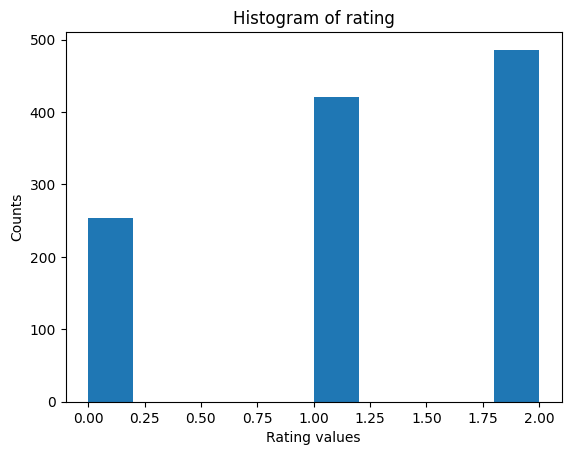

In [ ]:
#Distribution of rate
plt.hist(rate["rating"])
plt.xlabel("Rating values")
plt.ylabel("Counts")
plt.title("Histogram of rating")

Text(0.5, 1.0, 'Percentages for rating')

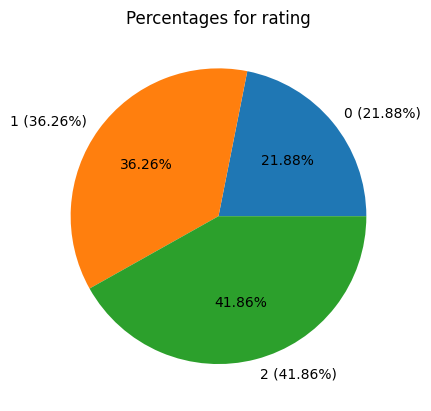

In [ ]:
total = rate["rating"].value_counts()[0] + rate["rating"].value_counts()[1] + rate["rating"].value_counts()[2]
values = [rate["rating"].value_counts()[0],rate["rating"].value_counts()[1],rate["rating"].value_counts()[2]]
pers = [c / total * 100 for c in values]
rating_vals = [0,1,2]
plt.pie(
    values,
    labels=[f"{r} ({per:.2f}%)" for r, per in zip(rating_vals, pers)],
    autopct='%1.2f%%'

)
plt.title("Percentages for rating")

#Preprocessing

In [ ]:
#selected important columns to be used in recommended system
resturants = resturants[["placeID","name","address"]]
rate = rate[["userID","placeID","rating"]]
resturants.head()

,placeID,name,address
0,134999,Kiku Cuernavaca,Revolucion
1,132825,puesto de tacos,esquina santos degollado y leon guzman
2,135106,El Rincón de San Francisco,Universidad 169
3,132667,little pizza Emilio Portes Gil,calle emilio portes gil
4,132613,carnitas_mata,lic. Emilio portes gil


In [ ]:
rate.head()

,userID,placeID,rating
0,U1077,135085,2
1,U1077,135038,2
2,U1077,132825,2
3,U1077,135060,1
4,U1068,135104,1


In [ ]:
#check if there is null values
rate.isna().sum()

,0
userID,0
placeID,0
rating,0


#Filtering

In [ ]:
#Collaborative filtering
#for each user get rating for all resturants
user_resturants = rate.pivot_table(
    index='userID', columns='placeID', values='rating'
    )
#if there is no rating by a user to a resturant fill 0
user_resturants = user_resturants.fillna(0)
user_resturants.head()

placeID,132560,132561,132564,132572,132583,132584,132594,132608,132609,132613,...,135080,135081,135082,135085,135086,135088,135104,135106,135108,135109
userID,,,,,,,,,,,,,,,,,,,,,
U1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
U1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
U1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Pearson Correlation & Weighted Rate

In [ ]:
#Calculate Pearson Correlation and get the first x neighbors
def select_topx_neighbors(df,topx=4):
  #calc correlation
  df = df.T
  corr_mat = df.corr()
  corr_mat = corr_mat.fillna(0)
  #Sorting based on correlation
  corr_mat = corr_mat.apply(lambda row: row.sort_values(), axis=1)
  user_corr_dic = {}
  #get top x similar users
  for user_id in corr_mat.index:
    first_topx_rows = corr_mat.loc[user_id].sort_values(
        ascending=False).head(topx+1)
    user_corr_dic[user_id] = first_topx_rows.iloc[1:].to_frame()

  return user_corr_dic

#set x to 5
top_x_neighbors = select_topx_neighbors(user_resturants,5)

#samples of results
top_x_neighbors["U1002"]

,U1002
userID,
U1029,0.550716
U1090,0.395969
U1045,0.391730
U1009,0.383969
U1078,0.368427


In [ ]:
#getting records of visited resturant for each neighbor user
def get_rest_record_for_topx_neighbors(select_topx_neighbors,rate_df):
  select_topx_neighbors_with_rating  ={}

  for k in select_topx_neighbors.keys():
    select_topx_neighbors_with_rating[k] = []
    ind_val = 0
    #for each user getting the visited resturant and rating for it
    for u in select_topx_neighbors[k].index:
      new_val = (u,select_topx_neighbors[k].values[ind_val],
                (rate_df.loc[rate_df['userID'] == u,
                             ['placeID','rating']].values))
      select_topx_neighbors_with_rating[k].append(new_val)
      ind_val +=1
  return select_topx_neighbors_with_rating


In [ ]:
records = get_rest_record_for_topx_neighbors(top_x_neighbors,rate)

In [ ]:
#Apply weighted rate
def get_weighted_rate(records,input_user):
  record = records[input_user]
  result = []
  #save user id and rate with similarity index
  for el in record:
    val0 = el[0]
    val1 = []
    sim_ind = el[1][0]
    for rate in el[2]:
      #apply weighted rate by multiple rate with similarity index
      val1.append((rate[0],rate[1],rate[1]*sim_ind))
    result.append((val0,sim_ind,val1))
  return result
#for user inputs
users = ["U1068","U1029","U1090","U1045","U1009","U1078"]
input_user = users[0]
result_weighted_rate_list = get_weighted_rate(records,input_user)

In [ ]:
#get the data as dataframe to show previous results
result_weighted_rate_dic = {"similarityIndex":[],
                            "userID":[],"placeID":[],
                            "rating":[],
                            "weightedrating":[]}
for r in result_weighted_rate_list:
  for w_r in r[2]:
    result_weighted_rate_dic["similarityIndex"].append(r[1])
    result_weighted_rate_dic["userID"].append(r[0])
    result_weighted_rate_dic["placeID"].append(w_r[0])
    result_weighted_rate_dic["rating"].append(w_r[1])
    result_weighted_rate_dic["weightedrating"].append(w_r[2])
result_wighted_rate_df = pd.DataFrame(result_weighted_rate_dic)
#sorted the weighted rate results based on weighted rates
result_wighted_rate_df = result_wighted_rate_df.sort_values(
    by='weightedrating',ascending=False)
result_wighted_rate_df.head(20)

,similarityIndex,userID,placeID,rating,weightedrating
7,0.603306,U1103,132733,2,1.206611
3,0.603306,U1103,132613,2,1.206611
10,0.517306,U1123,135104,2,1.034612
19,0.440225,U1023,132733,2,0.880451
35,0.382113,U1028,132613,2,0.764225
33,0.382113,U1028,132630,2,0.764225
0,0.603306,U1103,132584,1,0.603306
6,0.603306,U1103,132663,1,0.603306
5,0.603306,U1103,135104,1,0.603306
2,0.603306,U1103,132630,1,0.603306


#Recommend Resturant

In [ ]:
#Get recommendation
def get_recommended_resturant(result_wighted_rate_df,resturants,topx):
  #for each plce id
  place_ids = result_wighted_rate_df["placeID"]
  results = {"placeID":[],"name":[]}
  for p in place_ids:
    #get the name for each place id
    rest_name = resturants.loc[resturants['placeID'] == p,
                               'name'].iloc[0]
    results["placeID"].append(p)
    results["name"].append(rest_name)
  results = pd.DataFrame(results)
  #return top x recommended resturant for user "U1068"
  return results.iloc[:topx]


In [ ]:
#Final recommendation results
recommended_rest = get_recommended_resturant(
    result_wighted_rate_df,resturants,10
    )
recommended_rest.head(10)

,placeID,name
0,132733,Little Cesarz
1,132613,carnitas_mata
2,135104,vips
3,132733,Little Cesarz
4,132613,carnitas_mata
5,132630,palomo tec
6,132584,Gorditas Dona Tota
7,132663,tacos abi
8,135104,vips
9,132630,palomo tec


#Evaluation

In [ ]:
#calculate rmse
from sklearn.metrics import mean_squared_error
def get_rmse(rate,predicted_rate):
  mse = mean_squared_error(rate,predicted_rate)
  rmse = np.sqrt(mse)
  return rmse


In [ ]:
#for each resturant get the rmse
rmses = []
rest_rmses = {}
unique_pid = result_wighted_rate_df["placeID"].unique()
for p_id in unique_pid:
  rate = result_wighted_rate_df.loc[
      result_wighted_rate_df['placeID'] == p_id, "rating"
      ]
  pred_rate = result_wighted_rate_df.loc[
      result_wighted_rate_df['placeID'] == p_id, "weightedrating"
      ]
  rmse = get_rmse(rate,pred_rate)
  rmses.append(rmse)
  rest_rmses[p_id]= rmse
#average of rmse is to divid all rmse for
#each resturant on number of suggested resturant
print("Average RMSE for input user:",input_user,sum(rmses)/len(rmses))


Average RMSE for input user: U1068 0.36686716806689945


#Evaluation And Comparing between resturants

In [ ]:
rest_rmses_s = pd.Series(rest_rmses,name="Recommendation Score")
rest_rmses_s.index.name = "Place ID"
rest_rmses_s.head(15)

,Recommendation Score
Place ID,
132733,0.706772
132613,0.772916
135104,0.602589
132630,0.816058
132584,0.441792
132663,0.229032
132667,0.441792
132608,0.341316
132740,0.452688
